In [2]:
from Corrfunc.mocks.DDsmu_mocks import DDsmu_mocks
from Corrfunc.theory.DDsmu import DDsmu
from Corrfunc.utils import convert_3d_counts_to_cf

import numpy as np
import pandas as pd
from astropy.cosmology import FlatLambdaCDM as FLCDM
import os
import time

import matplotlib.pyplot as plt

In [3]:
homedir = os.getcwd()

In [48]:
#code specs
nthreads=4 #number of threads used
nplc=64 #light cone files to read - 64 max for all light cone
mp=1 #Random catalog multiplier. Nrandom = mp*Nmocks. This means the random catalog will be mp times the size of the mock catalog.

#set correlation function range and bins
rmin  = 40  #Mpc/h
rmax  = 160 #Mpc/h
nbins = 24

rbins = np.logspace(np.log10(rmin), np.log10(rmax), nbins)
binfile=rbins

#redshift bin
zint=0.55 #bin centered at zint
dz=0.05 #interval {zint-dz,zint+dz}

#Mass bin
Mmin=10**13
Mmax=10**14

#set \mu bins 
nmu_bins = 100
mu_max = 1.0

#set cosmology
h=0.6774
cosmo=FLCDM(100*h,0.3089)



Consider the following position for particles in a light cone, both as cartersian coordinates and spherical coordinates

In [49]:
pos1 = pd.read_csv('xyz.csv').to_numpy()
pos2 = pd.read_csv('rradec.csv').to_numpy()

x, y, z = pos[:,0], pos[:,1], pos[:,2]
cz2, ra2, dec2 = pos2[:,0], pos2[:, 1], pos2[:, 2]

Let us compute the counts DD, using DDsmu and DDsmu_mocks:

In [50]:
#  ra dec
autocorr=1
time0=time.time()
resultsDD2=DDsmu_mocks(autocorr = autocorr, cosmology = 2, nthreads = nthreads, mu_max = mu_max,
                       nmu_bins = nmu_bins, binfile = binfile, 
                       RA1 = ra2, DEC1 = dec2, CZ1 = cz2, is_comoving_dist=True)
DD_counts2=np.array([], dtype=(np.float, 2))
for r in resultsDD2:
    DD_counts2=np.vstack((DD_counts2,np.array([r['mumax'],r['npairs']])))

DD_time = time.time()- time0
print("\t Tempo = ",DD_time,"s")


# xyz
autocorr=1
time0=time.time()

resultsDD1=DDsmu(autocorr, nthreads, binfile, mu_max, nmu_bins,x,y,z, periodic = False)
DD_counts1=np.array([], dtype=(np.float, 2))
for r in resultsDD1:
    DD_counts1=np.vstack((DD_counts1,np.array([r['mu_max'],r['npairs']])))

DD_time = time.time()- time0
print("\t Tempo = ",DD_time,"s")

	 Tempo =  1.578012466430664 s


/tmp/ipykernel_24951/2631436217.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  DD_counts2=np.array([], dtype=(np.float, 2))


	 Tempo =  1.3954451084136963 s


/tmp/ipykernel_24951/2631436217.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  DD_counts1=np.array([], dtype=(np.float, 2))


Now, let's plot the results and compare them:

In [51]:
cont = 0
DDxyz   = DD_counts1[cont::nmu_bins,1]
DDradec = DD_counts2[cont::nmu_bins,1]
bincenter = (rbins[:-1] + rbins[1:])/2

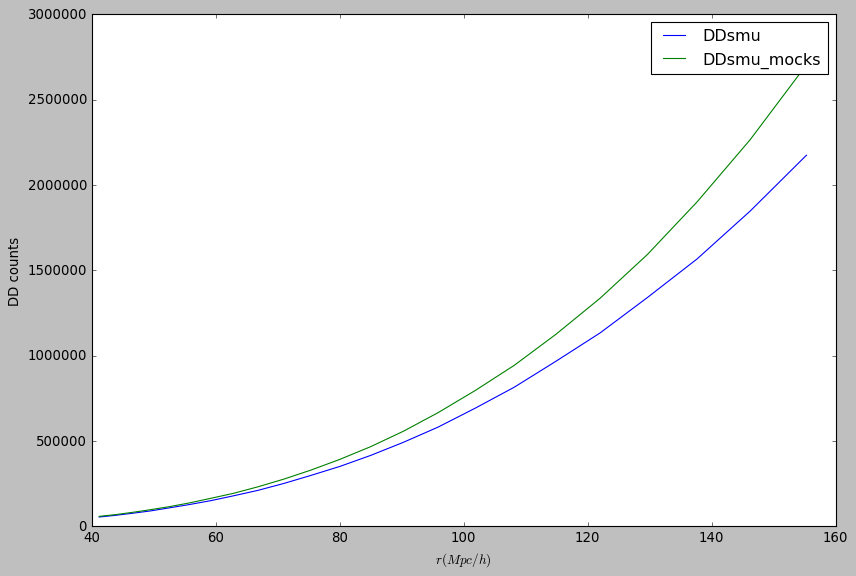

In [52]:
plt.style.use('classic')

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(bincenter, DDxyz)

ax.plot(bincenter, DDradec)

plt.xlabel(r'$r (Mpc/h)$')
plt.ylabel('DD counts')

ax.legend(['DDsmu', 'DDsmu_mocks'])
plt.show()

The results are different, even when considering the same set of particles!